#Maestría en "Analítica de Datos"
---
Nombre: Oscar Daniel Tunjano Rojas
Código:
Fecha: 2025 Agosto 28
---
Descripción: Este libro trabaja ejercicios "Entrenamiento en paralelo"

# Cargar datos


In [ ]:
import pandas as pd
import os
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url_folder ="/content/drive/MyDrive/BIG DATA/Tutelas clase 2"

# Obtener información
lista de archivos de la carpeta

In [ ]:
listadodearchivos = [f for f in os.listdir(url_folder) if f.endswith(".csv")]
print (listadodearchivos)

['tutelas_con_providencias_2021.csv', 'tutelas_con_providencias_2025.csv', 'tutelas_con_providencias_2024.csv', 'tutelas_con_providencias_2023.csv', 'tutelas_con_providencias_2022.csv']


In [ ]:
colum_nombres=[
    "clasificacion",
    "num_expediente",
    "fecha_rad",
    "demandante",
    "demandado",
    "primera_instancia",
    "segunda_instancia",
    "num_23dig",
    "providencia",
    "fecha_sentencia"
]
df_tutelas = pd.DataFrame(columns=colum_nombres)
display(df_tutelas)

,clasificacion,num_expediente,fecha_rad,demandante,demandado,primera_instancia,segunda_instancia,num_23dig,providencia,fecha_sentencia


# Procesamieno secuencial (uno tras otro )

In [ ]:
df_list =[]# lista de df resultante de los datos de cada uno de los data
for archivo_nombre in listadodearchivos :
  ruta_archivo= os.path.join(url_folder,archivo_nombre) # Ruta completa del archivo
  print(ruta_archivo)
  df_temporal = pd.read_csv(ruta_archivo, sep=';', header =None, encoding='latin-1',on_bad_lines='skip')
  #Agregarle nombre a las columnas
  df_temporal.columns=colum_nombres
  if (len(df_temporal.columns)==len(colum_nombres)):
    df_list.append(df_temporal)
    print(f"archivo {archivo_nombre} cargado exitosamente")
  else:
    print(f"archivo no trabajado {archivo_nombre} no tienen 10 columnas" )

  #una vexz termine de cargar los csv combinelos en uno solo
if df_list:
  df_tutelas = pd.concat(df_list, ignore_index=True)
  # reemplazar la palabra NULL por none
  df_tutelas.replace('NULL', None, inplace=True)
  display(df_tutelas.head())

/content/drive/MyDrive/BIG DATA/Tutelas clase 2/tutelas_con_providencias_2021.csv
archivo tutelas_con_providencias_2021.csv cargado exitosamente
/content/drive/MyDrive/BIG DATA/Tutelas clase 2/tutelas_con_providencias_2025.csv


/tmp/ipython-input-3166611798.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temporal = pd.read_csv(ruta_archivo, sep=';', header =None, encoding='latin-1',on_bad_lines='skip')


archivo tutelas_con_providencias_2025.csv cargado exitosamente
/content/drive/MyDrive/BIG DATA/Tutelas clase 2/tutelas_con_providencias_2024.csv
archivo tutelas_con_providencias_2024.csv cargado exitosamente
/content/drive/MyDrive/BIG DATA/Tutelas clase 2/tutelas_con_providencias_2023.csv
archivo tutelas_con_providencias_2023.csv cargado exitosamente
/content/drive/MyDrive/BIG DATA/Tutelas clase 2/tutelas_con_providencias_2022.csv
archivo tutelas_con_providencias_2022.csv cargado exitosamente


,clasificacion,num_expediente,fecha_rad,demandante,demandado,primera_instancia,segunda_instancia,num_23dig,providencia,fecha_sentencia
0,ï»¿Acciones de Tutela,T8531729,2021-12-16 00:00:00,VAZQUEZ CUADROS BAYRON EMILIO Y OTROS EN REPRE...,SOCIEDAD DE ACTIVOS ESPECIALES S.A.E. S.A.S.,"BOGOTA,CUNDINAMARCA, TRIBUNAL SUPERIOR DE BOGO...",--,--,--,NaN
1,Acciones de Tutela,T8531726,2021-12-16 00:00:00,ESCORCIA JORGE ARMANDO,ALCALDIA MUNICIPAL DE SANTA LUCIA,"SANTA LUCIA,ATLANTICO, JUZGADO 1 PROMISCUO MUN...","SABANALARGA,ATLANTICO, JUZGADO 2 PROMISCUO DEL...",--,--,NaN
2,Acciones de Tutela,T8531728,2021-12-16 00:00:00,ARCINIEGAS MEDRANO CLEMENCIA,COLPENCIONES Y OTRO,"BARRANQUILLA,ATLANTICO, JUZGADO 11 LABORAL DEL...","BARRANQUILLA,ATLANTICO, TRIBUNAL SUPERIOR SALA...",--,T-274/22,2022-07-28 00:00:00.000
3,Acciones de Tutela,T8531723,2021-12-16 00:00:00,SERRANO ROJAS CAMILO ANDRES,SECRETARIA DE MOVILIDAD DE CAQUEZA,"CAQUEZA,CUNDINAMARCA, JUZGADO 1 PROMISCUO MUNI...",--,--,--,NaN
4,Acciones de Tutela,T8531727,2021-12-16 00:00:00,GOMEZ QUINTERO EDILSA MARIA,CAJACOPI EPS Y OTRO,"CURUMANI,CESAR, JUZGADO PROMISCUO MUNICIPAL","CHIRIGUANA,CESAR, JUZGADO PENAL DEL CIRCUITO",--,--,NaN


In [ ]:
#mostrar la metada (como están clasificados los datos)
print(df_tutelas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3371223 entries, 0 to 3371222
Data columns (total 10 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   clasificacion      object
 1   num_expediente     object
 2   fecha_rad          object
 3   demandante         object
 4   demandado          object
 5   primera_instancia  object
 6   segunda_instancia  object
 7   num_23dig          object
 8   providencia        object
 9   fecha_sentencia    object
dtypes: object(10)
memory usage: 257.2+ MB
None


# Procesamiento en paralelo (todos al tiempo)
Entrar a entorno de ejecución para activar el cpu

In [ ]:
#Libreria para procesamiento en paralelo
from concurrent.futures import ThreadPoolExecutor, as_completed

In [ ]:
def read_csv_file(ruta_archivo, colum_nombres):
  try: #Operación que garantiza que si hay un archivo está mal no se dañe el proceso
        df_temporal = pd.read_csv(ruta_archivo, sep=';', header =None, encoding='latin-1',on_bad_lines='skip')
        #Agregarle nombre a las columnas
        df_temporal.columns=colum_nombres
        if (len(df_temporal.columns)==len(colum_nombres)):
            print(f"archivo {os.path.basename(ruta_archivo)} cargado exitosamente")
            return df_temporal
        else:
            print(f"archivo no trabajado {os.path.basename(ruta_archivo)} no tienen 10 columnas" )
            return None

  except Exception as e:
    print(f"Error al procesar el archivo {ruta_archivo}: {str(e)}")
    return None

In [ ]:
results = []
with ThreadPoolExecutor() as executor:
  future_to_file ={executor.submit(read_csv_file, os.path.join(url_folder,archivo_nombre), colum_nombres):archivo_nombre for archivo_nombre in listadodearchivos}
  for future in as_completed(future_to_file):
    df = future.result()
    if df is not None:
      results.append(df)

# Una vez termine de cargar todos los csv combinelos en el data frame df_tutelas
if results:
  df_tutelas = pd.concat(results, ignore_index=True)
  # reemplazar la palabra NULL por none
  df_tutelas.replace('NULL', None, inplace=True)
  display(df_tutelas.head())

archivo tutelas_con_providencias_2021.csv cargado exitosamente


/tmp/ipython-input-2683067419.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temporal = pd.read_csv(ruta_archivo, sep=';', header =None, encoding='latin-1',on_bad_lines='skip')


archivo tutelas_con_providencias_2022.csv cargado exitosamente
archivo tutelas_con_providencias_2025.csv cargado exitosamente
archivo tutelas_con_providencias_2023.csv cargado exitosamente
archivo tutelas_con_providencias_2024.csv cargado exitosamente


,clasificacion,num_expediente,fecha_rad,demandante,demandado,primera_instancia,segunda_instancia,num_23dig,providencia,fecha_sentencia
0,ï»¿Acciones de Tutela,T8531729,2021-12-16 00:00:00,VAZQUEZ CUADROS BAYRON EMILIO Y OTROS EN REPRE...,SOCIEDAD DE ACTIVOS ESPECIALES S.A.E. S.A.S.,"BOGOTA,CUNDINAMARCA, TRIBUNAL SUPERIOR DE BOGO...",--,--,--,NaN
1,Acciones de Tutela,T8531726,2021-12-16 00:00:00,ESCORCIA JORGE ARMANDO,ALCALDIA MUNICIPAL DE SANTA LUCIA,"SANTA LUCIA,ATLANTICO, JUZGADO 1 PROMISCUO MUN...","SABANALARGA,ATLANTICO, JUZGADO 2 PROMISCUO DEL...",--,--,NaN
2,Acciones de Tutela,T8531728,2021-12-16 00:00:00,ARCINIEGAS MEDRANO CLEMENCIA,COLPENCIONES Y OTRO,"BARRANQUILLA,ATLANTICO, JUZGADO 11 LABORAL DEL...","BARRANQUILLA,ATLANTICO, TRIBUNAL SUPERIOR SALA...",--,T-274/22,2022-07-28 00:00:00.000
3,Acciones de Tutela,T8531723,2021-12-16 00:00:00,SERRANO ROJAS CAMILO ANDRES,SECRETARIA DE MOVILIDAD DE CAQUEZA,"CAQUEZA,CUNDINAMARCA, JUZGADO 1 PROMISCUO MUNI...",--,--,--,NaN
4,Acciones de Tutela,T8531727,2021-12-16 00:00:00,GOMEZ QUINTERO EDILSA MARIA,CAJACOPI EPS Y OTRO,"CURUMANI,CESAR, JUZGADO PROMISCUO MUNICIPAL","CHIRIGUANA,CESAR, JUZGADO PENAL DEL CIRCUITO",--,--,NaN


# Observar los demandados y el número de demandas que tiene

In [ ]:
valores_unicos = df_tutelas['demandado'].unique()

print(valores_unicos)

['SOCIEDAD DE ACTIVOS ESPECIALES S.A.E. S.A.S.'
 'ALCALDIA MUNICIPAL DE SANTA LUCIA' 'COLPENCIONES Y OTRO' ...
 'COMISARIO DE FAMILIA DE TAURAMENA - CASANARE Y OTROS'
 'SECRETARIA MOVILIDAD ITAGUI Y OTROS'
 'JUZGADO 001 DE EJECUCIÃ\x93N DE PENAS DE BUGA Y OTROS']


In [ ]:
#valores unicos y cantidad de demandasa que tiene la entidad demandada
valores_unicos = df_tutelas['demandado'].value_counts()

print(valores_unicos)

demandado
NUEVA EPS                                                           134623
UARIV                                                                68133
COLPENSIONES                                                         54710
NUEVA EPS Y OTROS                                                    54699
SANITAS EPS                                                          37136
                                                                     ...  
INSPECCIÃN ESPECIAL DE POLICIA DE UNIÃN PANAMERICANA                   1
ALCALDIA DE BELO; SECRETARIA DE TRANSITO DE BELLO                        1
SUPERTEX S.A. Y SOLUCIONES INMEDIATAS S.A.                               1
SANIDA POLICIA NACIONAL POPAYAN                                          1
EMSSANAR S.A.S. EPS Y HOSPITAL UNIVERSITARIO DEL VALLE DEL CAUCA         1
Name: count, Length: 692732, dtype: int64


NameError: name 'plt' is not defined

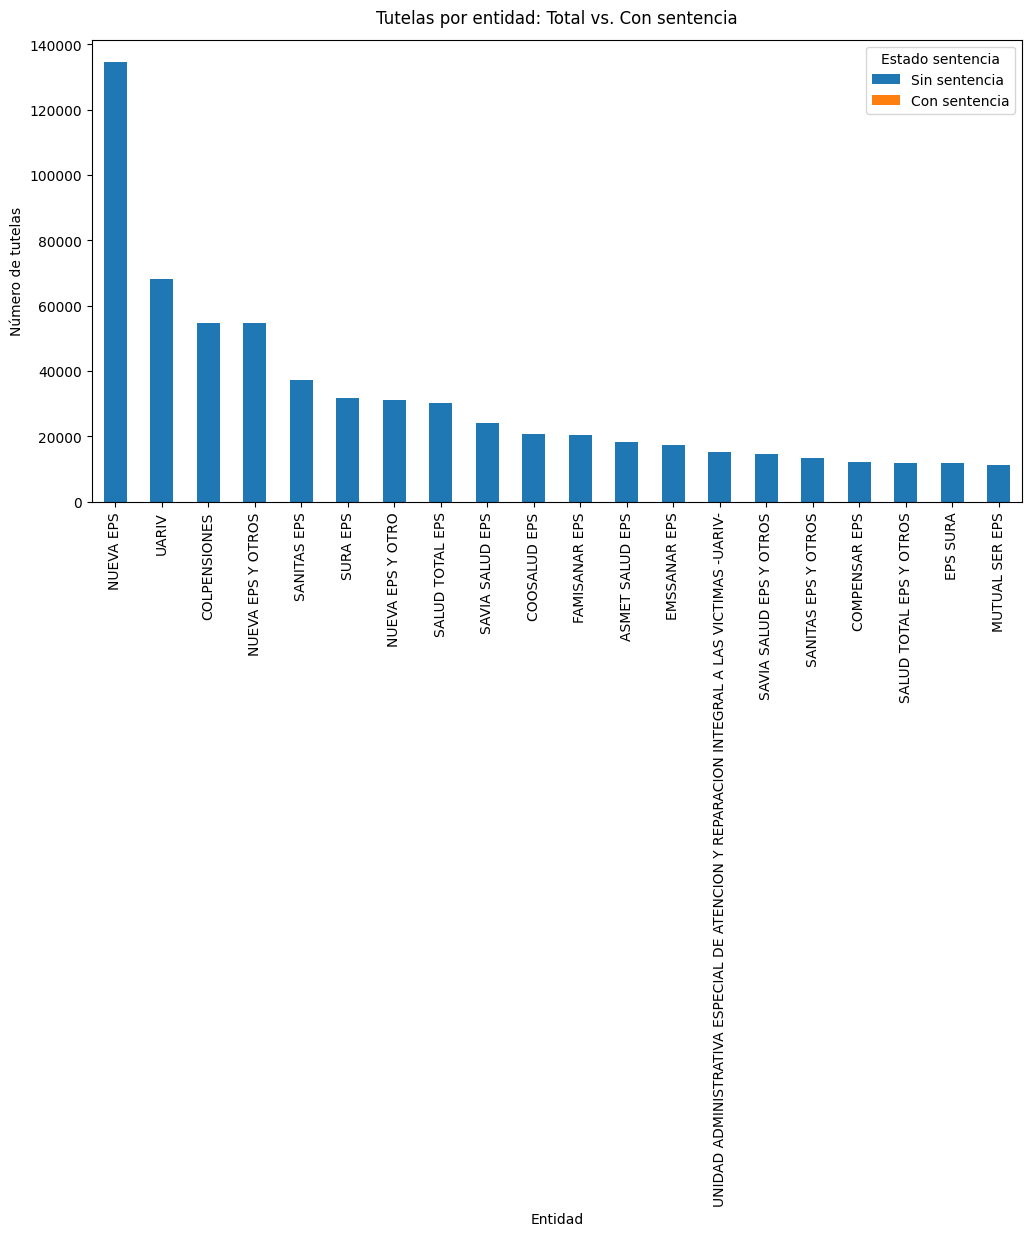

In [ ]:
df_tutelas['demandado'] = (
    df_tutelas['demandado']
    .astype(str)
    .str.strip()
    .str.upper()            # unificamos mayúsculas/minúsculas
)

# Parseo robusto de fecha; si no es fecha válida queda NaT
df_tutelas['fecha_sentencia'] = pd.to_datetime(df_tutelas['fecha_sentencia'], errors='coerce')

# 4) Flag de sentencia existente
df_tutelas['tiene_sentencia'] = df_tutelas['fecha_sentencia'].notna()

# 5) Agregación: conteo por entidad y estado de sentencia
agg = (
    df_tutelas.groupby(['demandado', 'tiene_sentencia'])
      .size()
      .unstack(fill_value=0)
      .rename(columns={False: 'Sin sentencia', True: 'Con sentencia'})
)

# 6) Ordenar por total (descendente) y, opcional, mostrar top-N
agg['Total'] = agg['Con sentencia'] + agg['Sin sentencia']
agg = agg.sort_values('Total', ascending=False)

top_n = 20  # cambia si quieres más/menos entidades en la gráfica
plot_df = agg.head(top_n).drop(columns='Total')

# 7) Gráfica de barras apiladas
ax = plot_df.plot(kind='bar', stacked=True, figsize=(12,6))
ax.set_title('Tutelas por entidad: Total vs. Con sentencia', pad=12)
ax.set_xlabel('Entidad')
ax.set_ylabel('Número de tutelas')
ax.legend(title='Estado sentencia', loc='upper right')
plt.tight_layout()
plt.show()